# <font style="color:rgb(50,120,229)"> Image Filtering and Convolution</font>

Our focus for this course is Computer Vision, but some understanding of Image Processing is extremely important because Image Processing operations like Image Filtering are often used as a preprocessing step in Computer Vision applications.

# <font style = "color:rgb(50,120,229)">Signal Processing Jargon</font>

While reading Computer Vision and Machine Learning literature, you will see signal processing jargon that can be intimidating at times. Let us demystify a few of those terms here. 

**Image Patch:** An image patch is simply a small (3x3, 5x5 … ) region of the image centered around a pixel. 

**Low Frequency Information :** An image patch is said to have low frequency information if it is smooth and does not have a lot of texture.

**High Frequency Information :** An image patch is said to have high frequency information if it has a lot of texture (edges, corners etc.).

**Low Pass Filtering :** This is essentially image blurring / smoothing. It you blur an image, you smooth out the texture. As the name suggests, low pass filtering lets lower frequency information pass and blocks higher frequency information. 

**High Pass Filtering :** This is essentially a sharpening and edge enhancement type of operation. As the name suggests, low frequency information is suppressed and high frequency information is preserved in high pass filtering.

# <font style = "color:rgb(50,120,229)">What is Image Filtering?</font>

**Image Filtering** is a broad term applied to a variety of Image Processing techniques that enhance an image by eliminating unwanted characteristics (e.g. noise) and/or improving desired characteristics (e.g. better contrast). **Blurring, edge detection, edge enhancement, and noise removal** are all examples of image filtering.

Image filtering is a neighborhood (or local) operation. This means that the pixel value at location $(x, \;y)$ in the output image depends on the pixels in a small neighborhood of location $(x, \;y)$ in the input image. For example, image filtering using a 3x3 filter (also called a **kernel**) would make the output pixel at location $(x, \;y)$ depends on the input pixels at locations $(x, \;y)$ and its eight neighbors.

![Kernel Image](https://www.dropbox.com/s/yzd6sa9lv0fsqgh/kernel.png?dl=1)

When the output pixel depends only on a linear combination of input pixels, we call the filter a **Linear Filter**. Otherwise, it is called a **Nonlinear Filter**.


**What do we mean by a linear combination?**

We say a quantity  is a linear combination of quantities  and  if  can be written as 

$$
z = ax + by
$$

Where, $a$ and $b$ are constants. The above equation is the equation of a line, hence the name "linear combination".  depends only on the first power of $x$ and $y$ . 

What would a Nonlinear combination look like? Here are three examples. 
$$
z = ax^2 + by \\
z = ax^{3} + be^{y} \\
z = axy
$$

Anything that does not produce a straight line is nonlinear. 


Linear filters are efficiently implemented using a convolution operation.

# <font style = "color:rgb(50,120,229)">Convolution </font>

The most basic type of image filtering is called **Convolution**. It is the basis of all linear filters. If you want to blur an image, you use convolution. If you want to sharpen an image, you use a different convolution kernel. If you want to detect edges, convolution is the first step. And yes, it is the same convolution used in state-of-the-art neural networks. 

## <font style = "color:rgb(50,120,229)">What is convolution?</font>

A convolution operation requires **two inputs**

1. An input image : For color images, convolution is performed on the R, G and B channels separately. 

2. A convolution kernel : This is a small matrix of numbers. An example of a 3x3 convolution kernel is shown on the right. As you can see, there are no restrictions on entries of the kernel. They could be any kind of numbers -- positive, negative, decimals etc. 

$$\begin{bmatrix} 0 & 1 & 3 \\ 0.1 & -1 & 1.5 \\ 4 & 3 & 1.7 \end{bmatrix}$$


The output is a **filtered** image. Depending on the implementation of convolution operation, the size of the filtered image is either equal to or slightly smaller than the original image. It will be clear why the dimension of the output image is smaller in the next few paragraphs. 

Let us discuss convolution on a grayscale image. **For color images, convolution is performed independently on each channel.**

The image below illustrates the convolution operation. The 3x3 convolution kernel is shown in blue. We move pixel by pixel in the image and extract a patch centered at the pixel and of the same size as the convolution kernel. This patch is shown in red. The output pixel value is calculated by multiplying corresponding elements of the image patch and the convolution kernel followed by adding up all the products.


![Convolution Operation](https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w2-m3.1-convolution.png)


**Boundary Conditions?**

You may be thinking this is all good and fine, but what happens at the boundary? At the boundary, the convolution is not uniquely defined. There are a few options we can choose from.

1. **Ignore the boundary pixels :** If we discount the boundary pixels, the output image will be slightly smaller than the input image.

2. **Zero padding :** We can pad the input image with zeros at the boundary pixels to make it larger and then perform convolution.

3. **Replicate border :** The other option is to replicate the boundary pixels of the input image and then perform the convolution operation on this larger image. 

4. **Reflect border :** The preferred option is to reflect the border about the boundary. Reflecting ensures a smooth intensity transition of pixels at the boundary. 

By default OpenCV uses border type `BORDER_REFLECT_101` which is the same as option `4`.

### **<font style = "color:rgb(255,0,0)">Note:</font>** 

Strictly speaking, the convolution filtering described above is actually called correlation filtering. Correlation and convolution are exactly the same operation with one difference. In convolution, the kernel is rotated 180 degrees before doing the correlation operation. When the kernel is symmetric, correlation and convolution are the same.

## <font style = "color:rgb(50,120,229)">Convolution in OpenCV</font>

In OpenCV, convolution is performed using the function [**`filter2D`**](https://docs.opencv.org/4.1.0/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04). The basic usage is given below.

### <font style = "color:rgb(8,133,37)">Function Syntax</font>

```python
dst	=	cv.filter2D(	src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]]
```

**Parameters**
- **`src`**	input image.
- **`dst`**	output image of the same size and the same number of channels as src.
- **`ddepth`**	desired depth of the destination image.
- **`kernel`**	convolution kernel (or rather a correlation kernel), a single-channel floating point matrix; if you want to apply different kernels to different channels, split the image into separate color planes using split and process them individually.
- **`anchor`**	anchor of the kernel that indicates the relative position of a filtered point within the kernel; the anchor should lie within the kernel; default value (-1,-1) means that the anchor is at the kernel center.
- **`delta`**	optional value added to the filtered pixels before storing them in dst.
- **`borderType`**	pixel extrapolation method.

The parameters like anchor point, delta and borderType are almost never changed from their default values.

Let us go through a short tutorial for using convolution.

## <font style="color:rgb(50,120,229)">Convolution Example</font>

In [1]:
import cv2
import numpy as np
from dataPath import DATA_PATH
import matplotlib.pyplot as plt
%matplotlib inline

filename = DATA_PATH+"images/sample.jpg"

image = cv2.imread(filename)

if image is None:  # Check if file is not present
    print("Could not open or find the image")

### <font style="color:rgb(8,133,37)">Define a Kernel </font>
First, we need to define a kernel. For this exercise, let’s use a kernel size of 5x5. To keep things simple, we will also choose a kernel where all elements are the same. This kernel is often called a **Box Kernel**. Notice, the sum of all the elements of the kernel add up to 1. This ensures that the output image has the same brightness level as the input image. If we do not do this, the output pixels will be approximately 25 times (5x5 = 25) brighter than the input pixels on average.

In [19]:
kernel_size = 5
# Create a 5*5 kernel with all elements equal to 1
kernel = np.ones((kernel_size, kernel_size), dtype=np.float32) / kernel_size**2

# Print Kernel
print (kernel)

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


### <font style="color:rgb(8,133,37)">Perform convolution </font>

Next, `filter2D` is used to perform the convolution. Notice, you do not have to explicitly allocate space for the filtered image. It is done automatically for you inside `filter2D`.

The second parameter (depth) is set to `-1`, which means the bit-depth of the output image is the same as the input image. So if the input image is of type `uint8`, the output image will also be of the same type.

In [20]:
result = cv2.filter2D(image, -1, kernel, (-1, -1), delta=0, borderType=cv2.BORDER_DEFAULT)

Text(0.5, 1.0, 'Convolution Result')

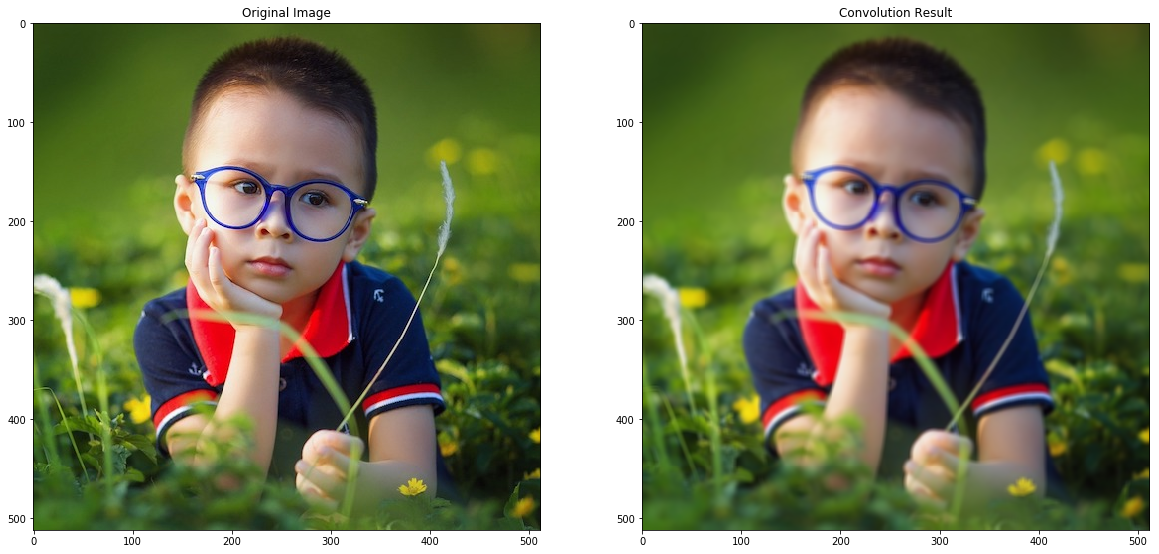

In [23]:
plt.figure(figsize=[20,10])
plt.subplot(121);plt.imshow(image[...,::-1]);plt.title("Original Image")
plt.subplot(122);plt.imshow(result[...,::-1]);plt.title("Convolution Result")

### <font style="color:rgb(8,133,37)">Try it Yourself! </font>
Try out with different kernels and see how the output changes. For example, 
1. Try without normalizing the values by `#elements`
1. change the values in the kernel and see if you can make sense out of the output

We will see various kinds of filtering which use different types of kernels in the next sections.